# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp29 # use or create a database named demo
tweet_collection = db.lab11 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [10]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [11]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5246403,-77.5633015,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [12]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 19 17:41:45 +0000 2020'
'Thu Nov 19 17:41:38 +0000 2020'
'Thu Nov 19 17:41:31 +0000 2020'
'Thu Nov 19 17:41:23 +0000 2020'
'Thu Nov 19 17:41:22 +0000 2020'
'Thu Nov 19 17:41:02 +0000 2020'
'Thu Nov 19 17:41:01 +0000 2020'
'Thu Nov 19 17:41:00 +0000 2020'
'Thu Nov 19 17:40:47 +0000 2020'
'Thu Nov 19 17:40:41 +0000 2020'
'Thu Nov 19 17:40:41 +0000 2020'
'Thu Nov 19 17:40:40 +0000 2020'
'Thu Nov 19 17:40:35 +0000 2020'
'Thu Nov 19 17:40:29 +0000 2020'
'Thu Nov 19 17:40:23 +0000 2020'
'Thu Nov 19 17:40:16 +0000 2020'
'Thu Nov 19 17:40:15 +0000 2020'
'Thu Nov 19 17:40:13 +0000 2020'
'Thu Nov 19 17:40:07 +0000 2020'
'Thu Nov 19 17:40:07 +0000 2020'
'Thu Nov 19 17:40:05 +0000 2020'
'Thu Nov 19 17:39:51 +0000 2020'
'Thu Nov 19 17:39:39 +0000 2020'
'Thu Nov 19 17:39:32 +0000 2020'
'Thu Nov 19 17:39:31 +0000 2020'
'Thu Nov 19 17:39:29 +0000 2020'
'Thu Nov 19 17:39:27 +0000 2020'
'Thu Nov 19 17:39:26 +0000 2020'
'Thu Nov 19 17:39:12 +0000 2020'
'Thu Nov 19 17:39:10 +0000 2020'
'Thu Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [13]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 19 17:34:33 +0000 2020'
'Thu Nov 19 17:34:22 +0000 2020'
'Thu Nov 19 17:34:20 +0000 2020'
'Thu Nov 19 17:34:16 +0000 2020'
'Thu Nov 19 17:34:15 +0000 2020'
'Thu Nov 19 17:34:11 +0000 2020'
'Thu Nov 19 17:34:04 +0000 2020'
'Thu Nov 19 17:34:01 +0000 2020'
'Thu Nov 19 17:33:51 +0000 2020'
'Thu Nov 19 17:33:46 +0000 2020'
'Thu Nov 19 17:33:42 +0000 2020'
'Thu Nov 19 17:33:41 +0000 2020'
'Thu Nov 19 17:33:38 +0000 2020'
'Thu Nov 19 17:33:35 +0000 2020'
'Thu Nov 19 17:33:27 +0000 2020'
'Thu Nov 19 17:33:23 +0000 2020'
'Thu Nov 19 17:33:19 +0000 2020'
'Thu Nov 19 17:33:06 +0000 2020'
'Thu Nov 19 17:33:02 +0000 2020'
'Thu Nov 19 17:32:57 +0000 2020'
'Thu Nov 19 17:32:56 +0000 2020'
'Thu Nov 19 17:32:50 +0000 2020'
'Thu Nov 19 17:32:46 +0000 2020'
'Thu Nov 19 17:32:46 +0000 2020'
'Thu Nov 19 17:32:40 +0000 2020'
'Thu Nov 19 17:32:40 +0000 2020'
'Thu Nov 19 17:32:38 +0000 2020'
'Thu Nov 19 17:32:36 +0000 2020'
'Thu Nov 19 17:32:34 +0000 2020'
'Thu Nov 19 17:32:30 +0000 2020'
'Thu Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [14]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

17753
13500


Create a text index and print the Tweets containing specific keywords. 

In [15]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [17]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Elizabeth ✨
text: #COVID19 #COVID19AB #Biden #trump #TransitionNow #GOPCorruptionOverCountry #ScienceMatters #science #TrumpCrimeFamily #COVIDー19
----
name: #NASTYWOMENFORBIDEN2020
text: Turns out @HarveyWeinstein may have COVID. He is in isolation with a 101 degree fever. What are your thoughts? #Covid_19 #COVID19 #COVIDー19
----
name: 🇺🇸♥️♥️🧡💛💙💚🖤🇺🇸#Freedom🇺🇸#American🇺🇸
text: #COVID19 #Denialism? What is that?  I have read @realDonaldTrump supporters deny #COVID19 is real.  I am a #Trump s… https://t.co/INTwMGSbRw
----
name: Kathie Bailey
text: RT @NASEM_BISO: Our #International Collaboration in the #COVID19 Era webinar will examine how COVID19 has disrupted formal mechanisms for k…
----
name: Howard Gold
text: The problem with all this Covid19 testing is it can’t tell the difference between Covid19 and the seasonal flu that… https://t.co/F1125Brpwk
----
name: Dalia
text: #COVID19 #Thanksgiving 

How will the hospitals handle Salmonella poisoning next Friday followed by COVI

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [19]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id_str,quoted_status,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,extended_entities,display_text_range,extended_tweet
0,5fb6ae5b832d4822a2c77bea,Thu Nov 19 17:39:04 +0000 2020,1329479317449895940,1329479317449895940,#COVID19 #COVID19AB #Biden #trump #TransitionN...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",1.329477e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fb6aa5806e78d7ce7af53d8,Wed Nov 18 02:35:41 +0000 2020,1328889587356168196,1328889587356168196,Turns out @HarveyWeinstein may have COVID. He ...,False,"{'hashtags': [{'text': 'Covid_19', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fb6aa6906e78d7ce7af593c,Tue Nov 17 22:39:08 +0000 2020,1328830054038724610,1328830054038724610,#COVID19 #Denialism? What is that? I have rea...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fb6aa5a06e78d7ce7af5479,Wed Nov 18 02:04:21 +0000 2020,1328881702396178433,1328881702396178433,RT @NASEM_BISO: Our #International Collaborati...,False,"{'hashtags': [{'text': 'International', 'indic...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fb6a9bd06e78d7ce7af2162,Thu Nov 19 15:12:12 +0000 2020,1329442358329569283,1329442358329569283,The problem with all this Covid19 testing is i...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fb6a9bb06e78d7ce7af20e1,Thu Nov 19 15:23:00 +0000 2020,1329445074355314689,1329445074355314689,#COVID19 #Thanksgiving \n\nHow will the hospit...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fb6a9b506e78d7ce7af1efc,Thu Nov 19 16:08:00 +0000 2020,1329456401924710401,1329456401924710401,RT @NASEM_BISO: Our #International Collaborati...,False,"{'hashtags': [{'text': 'International', 'indic...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fb6aa5a06e78d7ce7af547f,Wed Nov 18 02:03:41 +0000 2020,1328881533894144001,1328881533894144001,Our #International Collaboration in the #COVID...,True,"{'hashtags': [{'text': 'International', 'indic...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fb6aa5706e78d7ce7af53af,Wed Nov 18 02:42:43 +0000 2020,1328891356811497473,1328891356811497473,We continue to demonstrate unprecedented speed...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fb6aa2b06e78d7ce7af4505,Wed Nov 18 15:51:24 +0000 2020,1329089833839386624,1329089833839386624,RT @LMLohrey: Trump's Covid19 Advisor Scott At...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


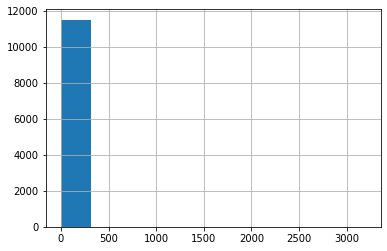

In [20]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count